In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
df.sample(7)

,Survived,Age,Fare
239,0,33.000000,12.2750
525,0,40.500000,7.7500
231,0,29.000000,7.7750
146,1,27.000000,7.7958
86,0,16.000000,34.3750
214,0,29.699118,7.7500
404,0,20.000000,8.6625


In [12]:
X=df.iloc[:,1:3]
Y=df.iloc[:,0]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

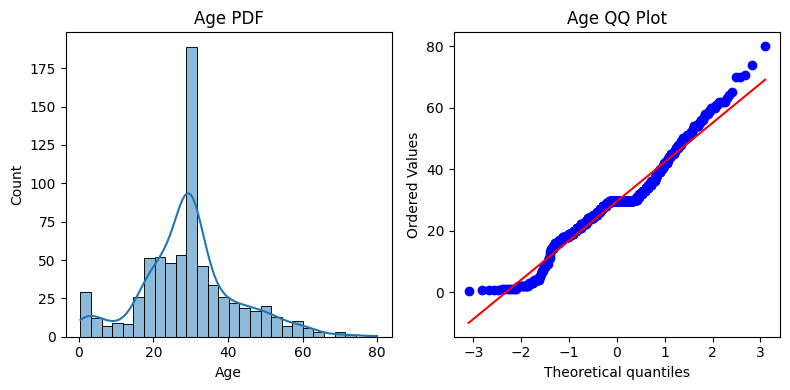

In [30]:
plt.figure(figsize=(8, 4))

# -------- PDF / Distribution Plot --------
plt.subplot(1, 2, 1)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

# -------- QQ Plot --------
plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.tight_layout()
plt.show()

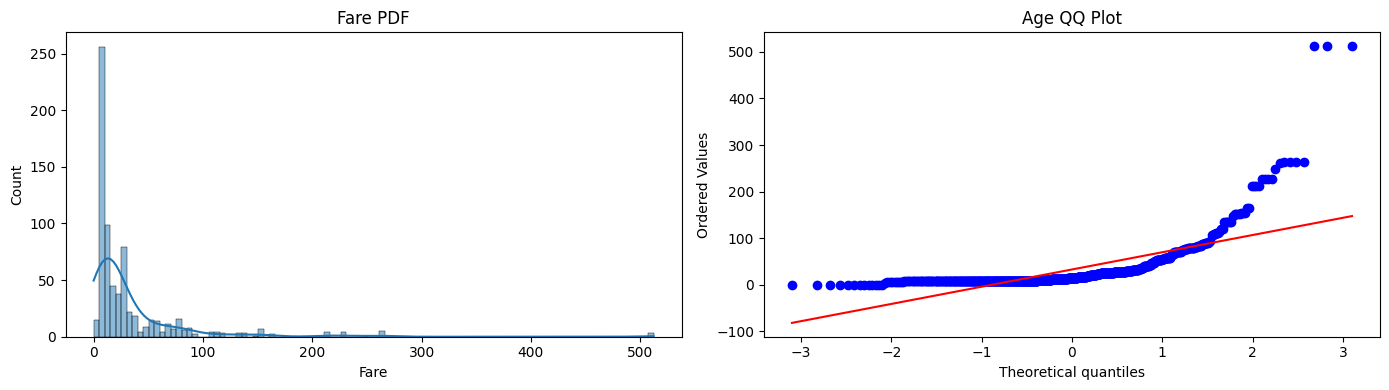

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')
plt.subplot(1,2,2)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.tight_layout()
plt.show()

In [48]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [50]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
Y_pred1=clf2.predict(X_test)
print('Accuracy LR=',accuracy_score(Y_test,Y_pred))
print('Accuracy DT=',accuracy_score(Y_test,Y_pred1))

Accuracy LR= 0.6480446927374302
Accuracy DT= 0.659217877094972


In [51]:
trf=FunctionTransformer(func=np.log1p)

In [52]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [53]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)
Y_pred=clf.predict(X_test)
Ypred1=clf2.predict(X_test)
print('Accuracy LR=',accuracy_score(Y_test,Y_pred))
print('Accuracy DT=',accuracy_score(Y_test,Y_pred1))

Accuracy LR= 0.7374301675977654
Accuracy DT= 0.659217877094972


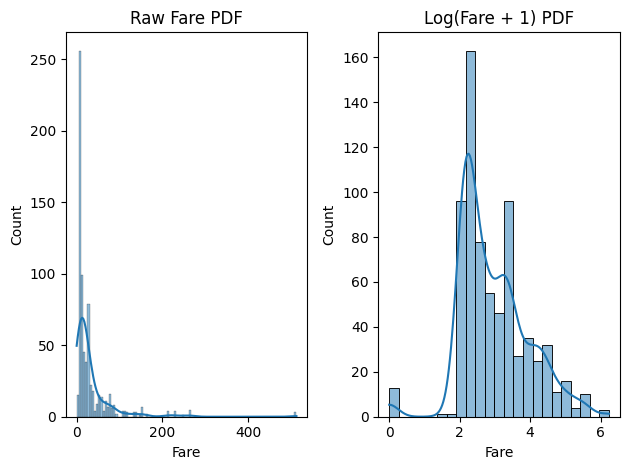

In [55]:
fare_raw = X_train['Fare'].dropna()
fare_log = np.log1p(fare_raw)
plt.subplot(1, 2, 1)
sns.histplot(fare_raw, kde=True)
plt.title('Raw Fare PDF')
# Log-transformed Fare
plt.subplot(1, 2, 2)
sns.histplot(fare_log, kde=True)
plt.title('Log(Fare + 1) PDF')
plt.tight_layout()
plt.show()

In [57]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6565917602996254


Text(0.5, 1.0, 'Fare After Log')

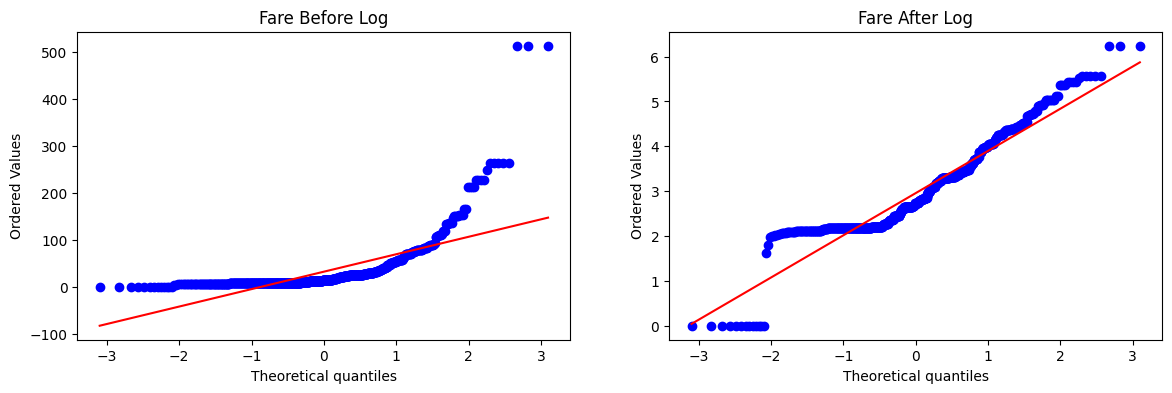

In [58]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

Text(0.5, 1.0, 'Age After Log')

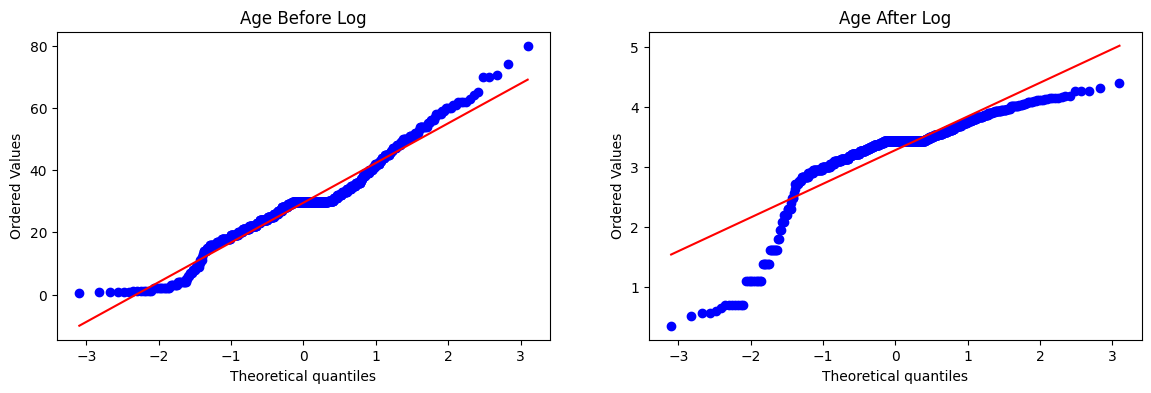

In [59]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

In [60]:

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [63]:

X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,Y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577028714107367
